Achmad Dhiaulhaq PYTN-KS018-019

### Import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

### Import dataset

In [2]:
X_data = pd.read_csv(r"C:\Users\Adi\Documents\codingan\data\bank+marketing\bank\bank-full.csv", sep=';')

In [3]:
X_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Cleaning data

In [4]:
# Membersihkan data menggunakan fungsi replace dengan mengganti semua data eror menjadi 0
X_data.replace(np.nan, 0,  inplace=True)
X_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# mengecek data eror
X_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
# Mengecek data duplikat
X_data.duplicated().sum()

0

## Mengubah jenis data object menjadi interger

In [7]:
# Mengubah data month dari tipe data object menjadi tipe data interger 
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
X_data['month'] = X_data['month'].map(months)
X_data['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [8]:
# Mengubah data default dari tipe data object menjadi tipe data interger 
default = {'yes':1, 'no':2}
X_data['default'] = X_data['default'].map(default)
X_data['default'].head()

0    2
1    2
2    2
3    2
4    2
Name: default, dtype: int64

In [9]:
X_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,2,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,2,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,2,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


In [10]:
# membuat variabel dengan membuat dummies pada tipe data object supaya data mudah ditrain
X_1 = pd.get_dummies(X_data, columns=['job', 
                               'marital', 
                               'education',  
                               'housing', 
                               'loan', 
                               'contact', 
                               'poutcome'])

In [11]:
X_1

,age,default,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
1,44,2,29,5,5,151,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
2,33,2,2,5,5,76,1,-1,0,no,...,1,0,1,0,0,1,0,0,0,1
3,47,2,1506,5,5,92,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
4,33,2,1,5,5,198,1,-1,0,no,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,825,17,11,977,3,-1,0,yes,...,0,1,0,1,0,0,0,0,0,1
45207,71,2,1729,17,11,456,2,-1,0,yes,...,0,1,0,1,0,0,0,0,0,1
45208,72,2,5715,17,11,1127,5,184,3,yes,...,0,1,0,1,0,0,0,0,1,0
45209,57,2,668,17,11,508,4,-1,0,no,...,0,1,0,0,1,0,0,0,0,1


In [12]:
# Membersihkan data X_1
X_1.replace(np.nan, 0,  inplace=True)
X_1

,age,default,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
1,44,2,29,5,5,151,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
2,33,2,2,5,5,76,1,-1,0,no,...,1,0,1,0,0,1,0,0,0,1
3,47,2,1506,5,5,92,1,-1,0,no,...,1,1,0,0,0,1,0,0,0,1
4,33,2,1,5,5,198,1,-1,0,no,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,825,17,11,977,3,-1,0,yes,...,0,1,0,1,0,0,0,0,0,1
45207,71,2,1729,17,11,456,2,-1,0,yes,...,0,1,0,1,0,0,0,0,0,1
45208,72,2,5715,17,11,1127,5,184,3,yes,...,0,1,0,1,0,0,0,0,1,0
45209,57,2,668,17,11,508,4,-1,0,no,...,0,1,0,0,1,0,0,0,0,1


In [13]:
# Membuat kolom target dengan mengubah data y menjadi 1 atau 0
X_1['target'] = X_1['y'].apply(lambda row: 1 if row == 'yes' else 0)
X_1[['y', 'target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [14]:
# Menghapus kolom y supaya tidak ada tipe data object
X_1.drop(columns=['y'], inplace=True)

In [15]:
X_1

,age,default,balance,day,month,duration,campaign,pdays,previous,job_admin.,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target
0,58,2,2143,5,5,261,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,44,2,29,5,5,151,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0
2,33,2,2,5,5,76,1,-1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,47,2,1506,5,5,92,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,33,2,1,5,5,198,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,825,17,11,977,3,-1,0,0,...,1,0,1,0,0,0,0,0,1,1
45207,71,2,1729,17,11,456,2,-1,0,0,...,1,0,1,0,0,0,0,0,1,1
45208,72,2,5715,17,11,1127,5,184,3,0,...,1,0,1,0,0,0,0,1,0,1
45209,57,2,668,17,11,508,4,-1,0,0,...,1,0,0,1,0,0,0,0,1,0


# Train data

In [16]:
# Membuat variabel untuk train data
X = X_1.drop('target', axis=1)
y = X_1['target']

In [17]:
# Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

### LogisticRegression

In [18]:
# Menggunakan model
logit = LogisticRegression()

# Melatih model
logit.fit(X_train, y_train)

# Melihat akurasi model
akurasi = logit.score(X, y)
print("akurasi:", akurasi)

akurasi: 0.8880582159209042


### KNN

In [19]:
# Mengimport library KNN
from sklearn.neighbors import KNeighborsClassifier
# Menggunakan model
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

# Prediksi model
y_pred = knn.predict(X_test.values)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8737835446770864
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12007
           1       0.43      0.29      0.34      1557

    accuracy                           0.87     13564
   macro avg       0.67      0.62      0.64     13564
weighted avg       0.86      0.87      0.86     13564



### SVM

In [20]:
# Mengimport library SVC
from sklearn.svm import SVC

# Menggunakan model SVM
svm = SVC()

# Melatih model
svm.fit(X_train, y_train)

# Memprediksi data
svmprediksi = svm.predict(X_test)
print("nilai prediksi: ", svmprediksi[:10])

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

nilai prediksi:  [0 0 0 0 0 0 0 0 0 0]
Akurasi: 0.8737835446770864
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12007
           1       0.43      0.29      0.34      1557

    accuracy                           0.87     13564
   macro avg       0.67      0.62      0.64     13564
weighted avg       0.86      0.87      0.86     13564



### Decision Tree

In [21]:
# Menggunakan model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Prediksi model
y_pred = DT.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8749631377174875
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     12007
           1       0.46      0.49      0.47      1557

    accuracy                           0.87     13564
   macro avg       0.70      0.71      0.70     13564
weighted avg       0.88      0.87      0.88     13564



### Random Forest

In [22]:
# Menggunakan model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prediksi model
y_pred = rf.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.9061486287230905
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12007
           1       0.66      0.37      0.48      1557

    accuracy                           0.91     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.91      0.89     13564



### Naive Bayes

In [23]:
# import library
from sklearn.naive_bayes import GaussianNB

# Menggunakan model
NV = GaussianNB()

# Melatih model
NV.fit(X_train, y_train)

# Prediksi model
y_pred = NV.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8216602772043645
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.90     12007
           1       0.33      0.54      0.41      1557

    accuracy                           0.82     13564
   macro avg       0.63      0.70      0.65     13564
weighted avg       0.87      0.82      0.84     13564



### Visual Data

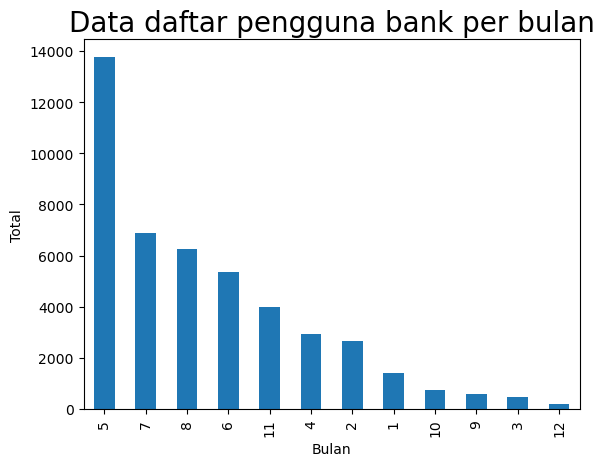

In [24]:
# Visualisasi data menggunakan data histogram
X_data['month'].value_counts().plot.bar()
plt.title("Data daftar pengguna bank per bulan", size=20)
plt.xlabel("Bulan")
plt.ylabel("Total")
plt.show()

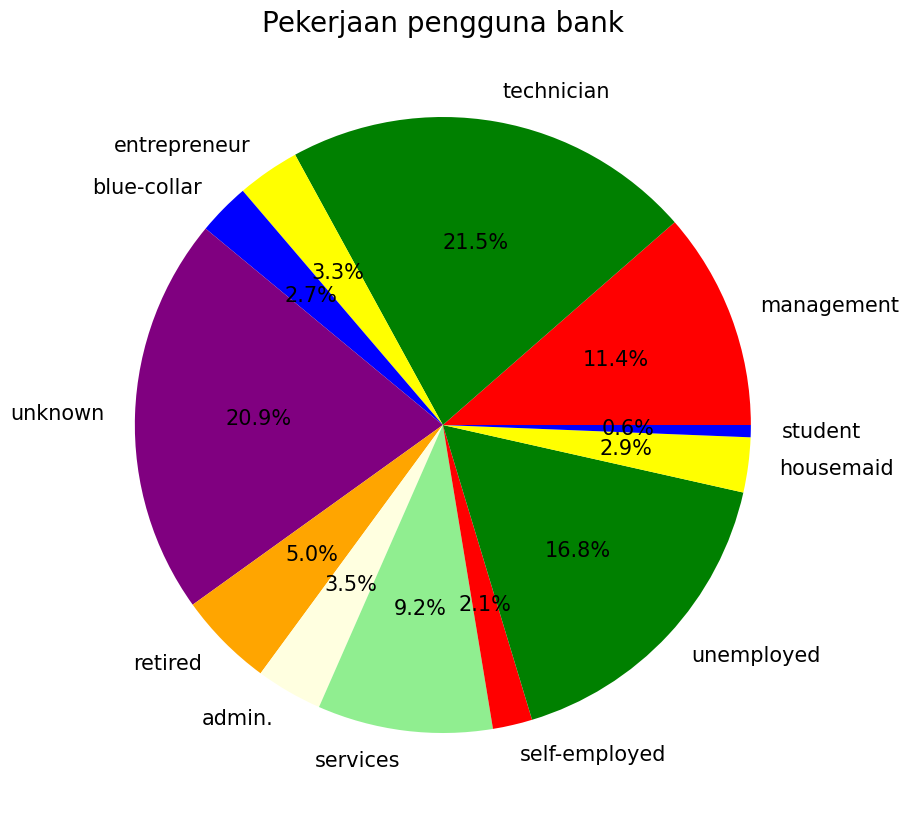

In [25]:
# membuat visualisasi data menggunakan pie chart
lables = X_data['job'].unique()
sizes = X_data.groupby(['job']).size()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightgreen']

plt.figure(figsize = (20,10))
plt.title('Pekerjaan pengguna bank', size=20)
plt.pie(sizes, labels = lables, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize': 15,'color':'black'})
plt.show()

### Analisis

Random forest cocok dengan dataset ini. Dilihat dari score tertinggi pada semua model machine learning. 